In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

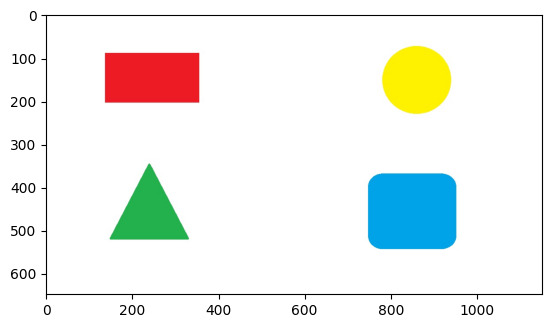

In [4]:
img = plt.imread('shapes.jpg')
plt.imshow(img)

In [5]:
img.shape

(648, 1152, 3)

In [6]:
x = img.reshape(-1,img.shape[-1])

In [7]:
kmeans = KMeans(n_clusters=5)

In [8]:
kmeans.fit(x)

KMeans(n_clusters=5)

In [9]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(img.shape)

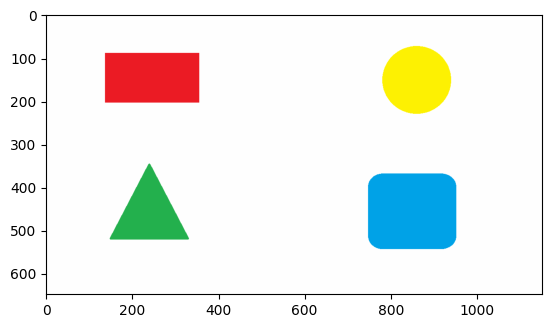

In [10]:
plt.imshow(segmented_img / 255)

In [11]:
import numpy as np

In [12]:
n_cluster = kmeans.n_clusters
n_cluster

5

In [13]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], shape=(746496,), dtype=int32)

In [14]:
for i in range(n_cluster):
    mask = kmeans.labels_ == i
    mask = mask.reshape(img.shape[:2])

    cluster_img = np.zeros_like(img)
    cluster_img[mask] = img[mask]

    plt.imsave(f'cluster_imgs/cluster_{i}.jpg', cluster_img)

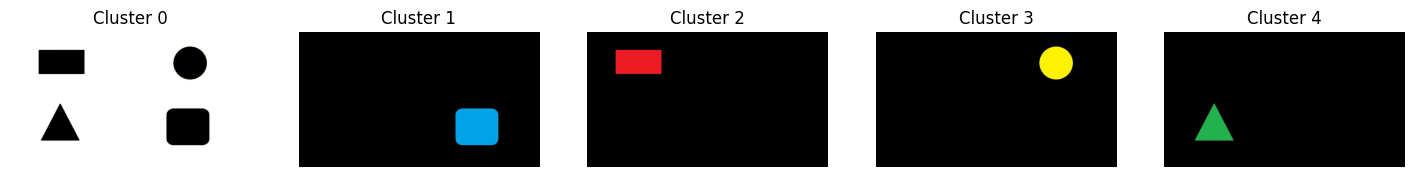

In [15]:
fig, axes = plt.subplots(1, n_cluster, figsize=(18, 10))

for i in range(n_cluster):
    img = plt.imread(f'cluster_imgs/cluster_{i}.jpg') 
    axes[i].imshow(img)
    axes[i].set_title(f'Cluster {i}')
    axes[i].axis('off')

plt.show()